<a href="https://colab.research.google.com/github/Rahafzsh/SpeechEmotionsRecognition/blob/main/Pre_Processing_SER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
#IMPORT THE LIBRARIES
import pandas as pd
import numpy as np
import os
import sys

In [18]:
from zipfile import ZipFile

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:

# Specify the path to your zip file
zip_file_path = '/content/drive/MyDrive/SAVEE.zip'

# Specify the directory where you want to extract the contents of the zip file
extract_dir = '/content/drive/MyDrive/SER (Dataset)'

# Create a ZipFile object
with ZipFile(zip_file_path, 'r') as zip_ref:
    # Extract all the contents of the zip file to the specified directory
    zip_ref.extractall(extract_dir)

print("Extraction complete.")

Extraction complete.


In [25]:

# Specify the path to your zip file
zip_file_path = '/content/drive/MyDrive/CREMA.zip'

# Specify the directory where you want to extract the contents of the zip file
extract_dir = '/content/drive/MyDrive/SER (Dataset)'

# Create a ZipFile object
with ZipFile(zip_file_path, 'r') as zip_ref:
    # Extract all the contents of the zip file to the specified directory
    zip_ref.extractall(extract_dir)

print("Extraction complete.")

Extraction complete.


In [21]:
# librosa is a Python library for analyzing audio and music.
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

In [44]:
SAVEE="/content/drive/MyDrive/SER (Dataset)/SAVEE/"
CREMA= "/content/drive/MyDrive/SER (Dataset)/CREMA/"

# SAVEE dataset:

In [45]:
savee_dir = os.listdir(SAVEE)

file_emotion = []
file_path = []

for file in savee_dir:
    file_path.append(SAVEE + file)
    part = file.split('_')[1]
    ele = part[:-6]
    if ele=='a':
        file_emotion.append('angry')
    elif ele=='d':
        file_emotion.append('disgust')
    elif ele=='f':
        file_emotion.append('fear')
    elif ele=='h':
        file_emotion.append('happy')
    elif ele=='n':
        file_emotion.append('neutral')
    elif ele=='sa':
        file_emotion.append('sad')
    else:
        file_emotion.append('surprise')

In [46]:
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
S_df = pd.concat([emotion_df, path_df], axis=1)
S_df.head()
print(S_df.Emotions.value_counts())

neutral     120
angry        60
disgust      60
fear         60
happy        60
sad          60
surprise     60
Name: Emotions, dtype: int64


# CREMA dataset:

In [47]:
crema_dir = os.listdir(CREMA)

file_emotion = []
file_path = []

for file in crema_dir:
    # storing file paths
    file_path.append(CREMA + file)
    # storing file emotions
    part=file.split('_')
    if part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] == 'DIS':
        file_emotion.append('disgust')
    elif part[2] == 'FEA':
        file_emotion.append('fear')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        file_emotion.append('Unknown')

In [48]:
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
C_df = pd.concat([emotion_df, path_df], axis=1)
C_df.head()
print(C_df.Emotions.value_counts())

angry      1271
disgust    1271
fear       1271
happy      1271
sad        1271
neutral    1087
Name: Emotions, dtype: int64


# Data Integration:

In [49]:
data_path = pd.concat([C_df, S_df], axis = 0)
data_path.to_csv("data_path.csv",index=False)
data_path.head()

,Emotions,Path
0,angry,/content/drive/MyDrive/SER (Dataset)/CREMA/100...
1,disgust,/content/drive/MyDrive/SER (Dataset)/CREMA/100...
2,fear,/content/drive/MyDrive/SER (Dataset)/CREMA/100...
3,happy,/content/drive/MyDrive/SER (Dataset)/CREMA/100...
4,neutral,/content/drive/MyDrive/SER (Dataset)/CREMA/100...


In [50]:
print(data_path.Emotions.value_counts())

angry       1331
disgust     1331
fear        1331
happy       1331
sad         1331
neutral     1207
surprise      60
Name: Emotions, dtype: int64


# Explotary Data Analysis (EDA) and Visualization:

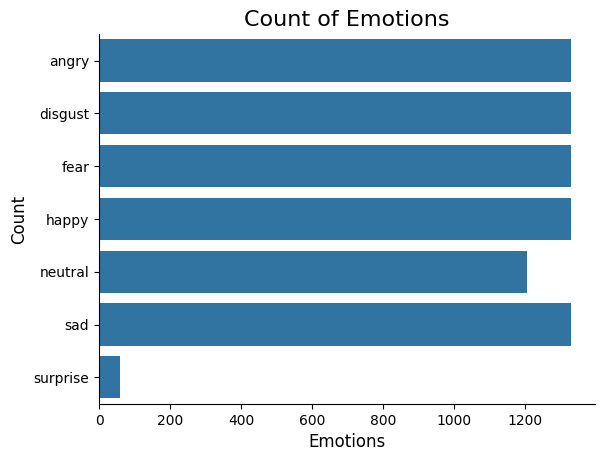

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.title('Count of Emotions', size=16)
sns.countplot(data_path.Emotions)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [52]:
!pip install audioread

In [53]:
import audioread
data,sr = librosa.load(file_path[0])
sr

22050

In [55]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# to play the audio files
import IPython.display as ipd
from IPython.display import Audio
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM,BatchNormalization , GRU
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import SGD



import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)
import tensorflow as tf

Done


In [56]:
ipd.Audio(data,rate=sr)

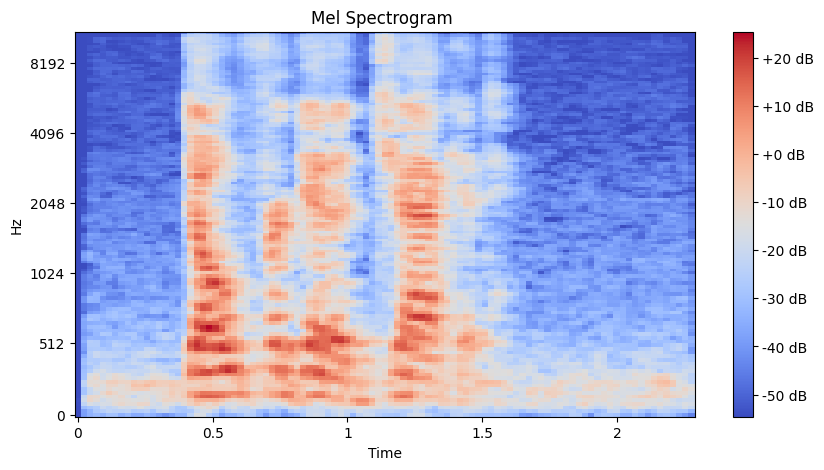

In [57]:
# CREATE LOG MEL SPECTROGRAM
plt.figure(figsize=(10, 5))
spectrogram = librosa.feature.melspectrogram(y=data, sr=sr, n_mels=128,fmax=8000)
log_spectrogram = librosa.power_to_db(spectrogram)
librosa.display.specshow(log_spectrogram, y_axis='mel', sr=sr, x_axis='time');
plt.title('Mel Spectrogram ')
plt.colorbar(format='%+2.0f dB');

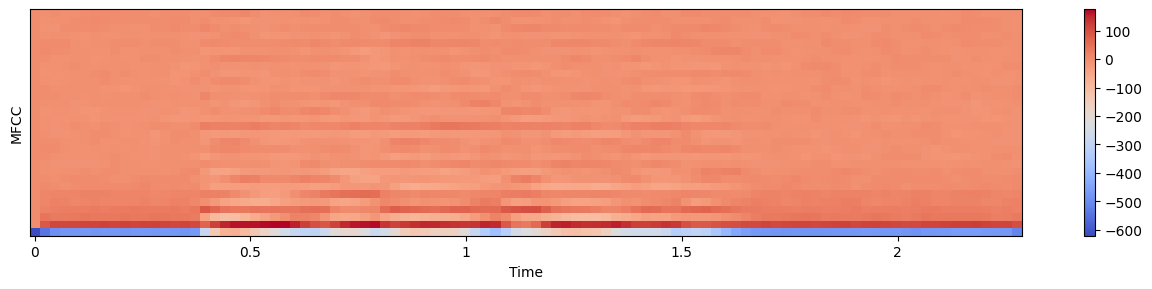

In [58]:
mfcc = librosa.feature.mfcc(y=data, sr=sr, n_mfcc=30)


# MFCC
plt.figure(figsize=(16, 10))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

ipd.Audio(data,rate=sr)

# Augmentation Data:

In [60]:
# to add noise
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

In [95]:
# to add pitch
def pitch(data, sampling_rate):
    return librosa.effects.pitch_shift(data, sampling_rate, n_steps=4)

In [63]:
# to add shift
def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

In [77]:
# to add stretch
def stretch(data, rate):
    return librosa.effects.time_stretch(data, rate=0.8)

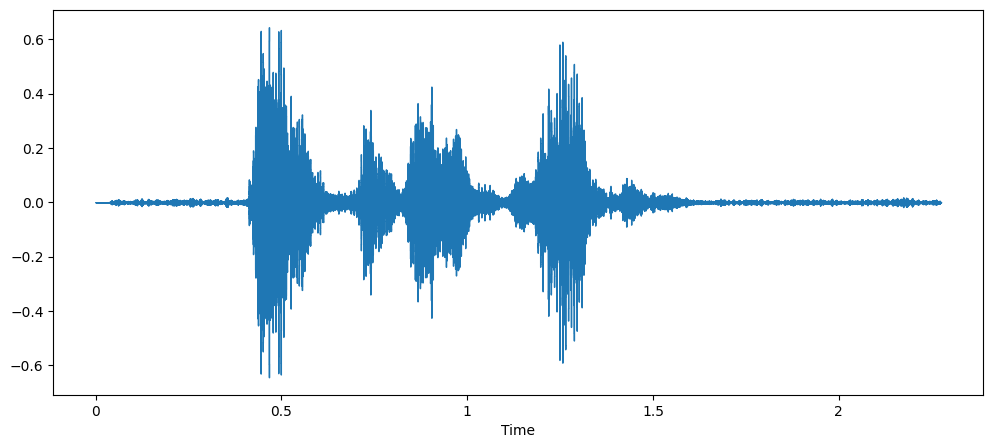

In [65]:
import librosa.display

#original voice

plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=data, sr=sr)
ipd.Audio(data,rate=sr)

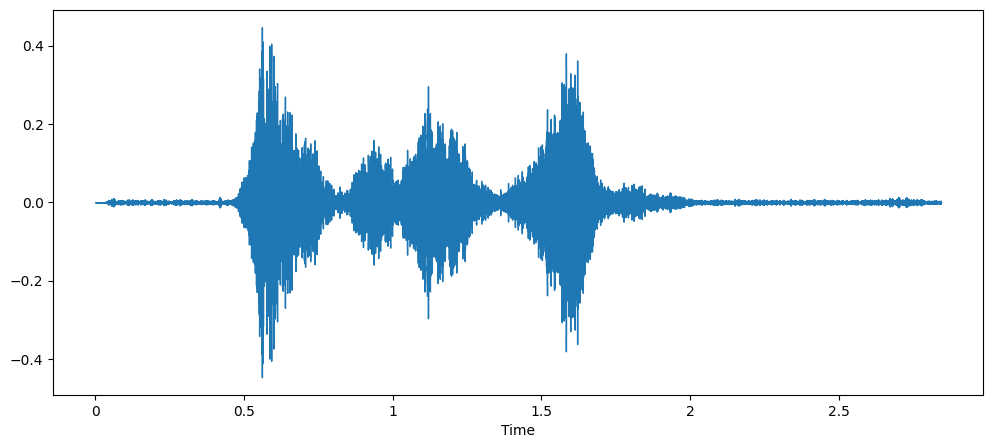

In [80]:
# audio with stretch
x = stretch(data, rate=0.9)
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=x, sr=sr)
ipd.Audio(x, rate=sr)

In [97]:
#  pitched audio
x = pitch(data, sr)
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=x, sr=sr)
ipd.Audio(x, rate=sr)

TypeError: pitch_shift() takes 1 positional argument but 2 positional arguments (and 1 keyword-only argument) were given